# 2
## Exploring the significance of the budget of a movie

### Importing necessary libraries // Establish a connection to the database

In [1]:
from importlib import reload

import sqlite3
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
conn = sqlite3.connect("movies_db.sqlite")
cur = conn.cursor()

In [3]:
for row in cur.execute("SELECT name FROM sqlite_master WHERE type='table';"):
    print(row)

('imdb_title_crew',)
('imdb_title_ratings',)
('imdb_title_principals',)
('rt_movie_info',)
('rt_reviews',)
('tmdb_movies',)
('tn_movie_budgets',)
('imdb_name_basics',)
('imdb_title_akas',)
('bom_movie_gross',)
('imdb_title_basics',)


### Looking at relationship between budget and popularity

In [7]:
cur.execute('''SELECT *
               FROM tn_movie_budgets
               JOIN tmdb_movies
               ON tn_movie_budgets.movie = tmdb_movies.original_title
               WHERE production_budget <= 300000000
            ''')
df = pd.DataFrame(cur.fetchall())
df.columns = [i[0] for i in cur.description]
df.head()

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_net,worldwide_net,release_day,...,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_day,release_month
0,6,7,2009-12-18 00:00:00,Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200,4.0,...,299536,en,Avengers: Infinity War,80.773,2018-04-27 00:00:00,Avengers: Infinity War,8.3,13948,4,4
1,8,9,2010-07-09 00:00:00,Justice League,300000000,229024295,655945209,-70975705,355945209,4.0,...,141052,en,Justice League,34.953,2017-11-17 00:00:00,Justice League,6.2,7510,4,11
2,8,9,2010-07-09 00:00:00,Justice League,300000000,229024295,655945209,-70975705,355945209,4.0,...,141052,en,Justice League,34.953,2017-11-17 00:00:00,Justice League,6.2,7510,4,11
3,9,10,2010-11-04 00:00:00,Spectre,300000000,200074175,879620923,-99925825,579620923,3.0,...,206647,en,Spectre,30.318,2015-11-06 00:00:00,Spectre,6.4,6719,4,11
4,9,10,2010-11-04 00:00:00,Spectre,300000000,200074175,879620923,-99925825,579620923,3.0,...,206647,en,Spectre,30.318,2015-11-06 00:00:00,Spectre,6.4,6719,4,11


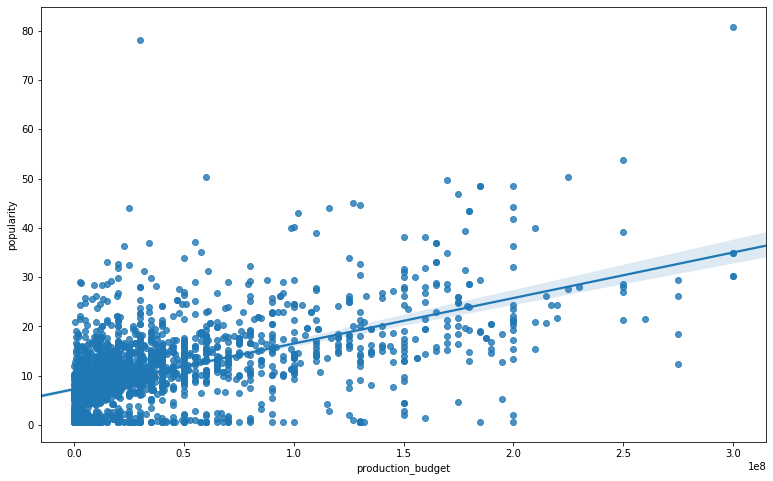

In [9]:
plt.figure(figsize=(13, 8))
sns.regplot(x='production_budget', y='popularity', data=df)
plt.show()

In [19]:
cur.execute('''SELECT *
               FROM tn_movie_budgets
               JOIN tmdb_movies
               ON tn_movie_budgets.movie = tmdb_movies.original_title
               WHERE production_budget <= 300000000
               ORDER BY popularity DESC
               LIMIT 200
            ''')
df2 = pd.DataFrame(cur.fetchall())
df2.columns = [i[0] for i in cur.description]
df2.head()

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_net,worldwide_net,release_day,...,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_day,release_month
0,6,7,2009-12-18 00:00:00,Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200,4.0,...,299536,en,Avengers: Infinity War,80.773,2018-04-27 00:00:00,Avengers: Infinity War,8.3,13948,4,4
1,1905,6,2010-10-23 00:00:00,John Wick,30000000,43037835,76235001,13037835,46235001,5.0,...,245891,en,John Wick,78.123,2014-10-24 00:00:00,John Wick,7.2,10081,4,10
2,21,22,2010-06-23 00:00:00,The Hobbit: The Battle of the Five Armies,250000000,255119788,945577621,5119788,695577621,2.0,...,122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17 00:00:00,The Hobbit: The Battle of the Five Armies,7.3,8392,2,12
3,26,27,1995-04-07 00:00:00,The Avengers,225000000,623279547,1517935897,398279547,1292935897,4.0,...,24428,en,The Avengers,50.289,2012-05-04 00:00:00,The Avengers,7.6,19673,4,5
4,934,35,2010-09-10 00:00:00,The Avengers,60000000,23385416,48585416,-36614584,-11414584,4.0,...,24428,en,The Avengers,50.289,2012-05-04 00:00:00,The Avengers,7.6,19673,4,5


In [20]:
print('Top 200 Movies by Popularity')
print('Mean Budget:',df2['production_budget'].mean())
print('Median Budget:',df2['production_budget'].median())

Top 200 Movies by Popularity
Mean Budget: 114726000.0
Median Budget: 106000000.0


In [24]:
cur.execute('''SELECT *
               FROM tn_movie_budgets
               JOIN tmdb_movies
               ON tn_movie_budgets.movie = tmdb_movies.original_title
               WHERE production_budget <= 300000000
               ORDER BY popularity
               LIMIT 200
            ''')
df3 = pd.DataFrame(cur.fetchall())
df3.columns = [i[0] for i in cur.description]
df3.head()

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_net,worldwide_net,release_day,...,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_day,release_month
0,50,51,2010-02-15 00:00:00,Alice in Wonderland,200000000,334191110,1025491110,134191110,825491110,0.0,...,423971,en,Alice in Wonderland,0.6,2010-01-01 00:00:00,Alice in Wonderland,6.0,1,4,1
1,74,75,2010-11-09 00:00:00,The Dark Knight,185000000,533720947,1001996207,348720947,816996207,1.0,...,72003,en,The Dark Knight,0.6,2011-07-11 00:00:00,The Dark Knight,6.6,5,0,7
2,235,36,2010-11-12 00:00:00,War of the Worlds,132000000,234280354,606836535,102280354,474836535,4.0,...,418931,en,War of the Worlds,0.6,2013-10-29 00:00:00,War of the Worlds,7.1,5,1,10
3,243,44,2010-09-14 00:00:00,Home,130000000,177397510,385997896,47397510,255997896,1.0,...,381507,en,Home,0.6,2016-03-01 00:00:00,Home,4.7,14,1,3
4,243,44,2010-09-14 00:00:00,Home,130000000,177397510,385997896,47397510,255997896,1.0,...,388223,en,Home,0.6,2016-03-17 00:00:00,Home,4.5,2,3,3


In [25]:
print('Bottom 200 Movies by Popularity')
print('Mean Budget:',df3['production_budget'].mean())
print('Median Budget:',df3['production_budget'].median())

Bottom 200 Movies by Popularity
Mean Budget: 21650540.0
Median Budget: 5950000.0


### Looking at the relationship between budget and worldwide gross

In [30]:
cur.execute('''SELECT *
               FROM tn_movie_budgets
               JOIN tmdb_movies
               ON tn_movie_budgets.movie = tmdb_movies.original_title
               WHERE production_budget <= 300000000
            ''')
df = pd.DataFrame(cur.fetchall())
df.columns = [i[0] for i in cur.description]
df.head()

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_net,worldwide_net,release_day,...,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_day,release_month
0,6,7,2009-12-18 00:00:00,Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200,4.0,...,299536,en,Avengers: Infinity War,80.773,2018-04-27 00:00:00,Avengers: Infinity War,8.3,13948,4,4
1,8,9,2010-07-09 00:00:00,Justice League,300000000,229024295,655945209,-70975705,355945209,4.0,...,141052,en,Justice League,34.953,2017-11-17 00:00:00,Justice League,6.2,7510,4,11
2,8,9,2010-07-09 00:00:00,Justice League,300000000,229024295,655945209,-70975705,355945209,4.0,...,141052,en,Justice League,34.953,2017-11-17 00:00:00,Justice League,6.2,7510,4,11
3,9,10,2010-11-04 00:00:00,Spectre,300000000,200074175,879620923,-99925825,579620923,3.0,...,206647,en,Spectre,30.318,2015-11-06 00:00:00,Spectre,6.4,6719,4,11
4,9,10,2010-11-04 00:00:00,Spectre,300000000,200074175,879620923,-99925825,579620923,3.0,...,206647,en,Spectre,30.318,2015-11-06 00:00:00,Spectre,6.4,6719,4,11


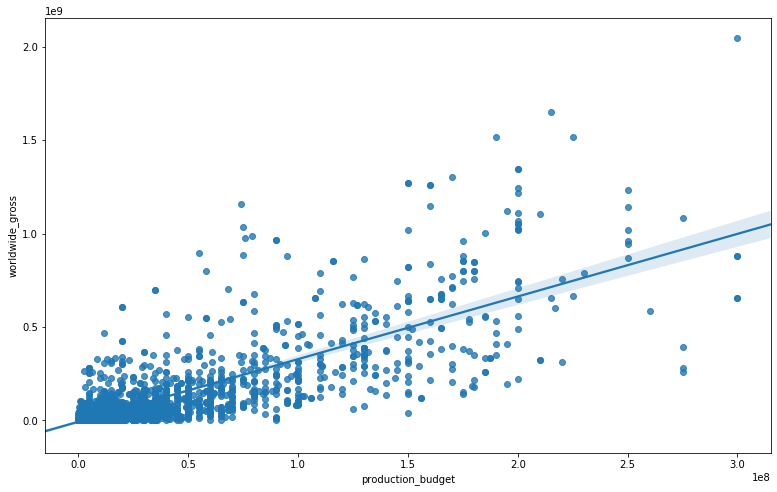

In [31]:
plt.figure(figsize=(13, 8))
sns.regplot(x='production_budget', y='worldwide_gross', data=df)
plt.show()

In [34]:
cur.execute('''SELECT *
               FROM tn_movie_budgets
               JOIN tmdb_movies
               ON tn_movie_budgets.movie = tmdb_movies.original_title
               WHERE production_budget <= 300000000
               ORDER BY worldwide_gross DESC
               LIMIT 200
            ''')
df4 = pd.DataFrame(cur.fetchall())
df4.columns = [i[0] for i in cur.description]
df4.head()

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_net,worldwide_net,release_day,...,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_day,release_month
0,6,7,2009-12-18 00:00:00,Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200,4.0,...,299536,en,Avengers: Infinity War,80.773,2018-04-27 00:00:00,Avengers: Infinity War,8.3,13948,4,4
1,33,34,2007-08-03 00:00:00,Jurassic World,215000000,652270625,1648854864,437270625,1433854864,4.0,...,135397,en,Jurassic World,20.709,2015-06-12 00:00:00,Jurassic World,6.6,14056,4,6
2,66,67,2010-07-27 00:00:00,Furious 7,190000000,353007020,1518722794,163007020,1328722794,1.0,...,168259,en,Furious 7,20.396,2015-04-03 00:00:00,Furious 7,7.3,6538,4,4
3,26,27,1995-04-07 00:00:00,The Avengers,225000000,623279547,1517935897,398279547,1292935897,4.0,...,24428,en,The Avengers,50.289,2012-05-04 00:00:00,The Avengers,7.6,19673,4,5
4,41,42,2010-08-13 00:00:00,Black Panther,200000000,700059566,1348258224,500059566,1148258224,4.0,...,86841,en,Black Panther,2.058,2011-01-18 00:00:00,Black Panther,5.1,11,1,1


In [35]:
print('Top 200 Movies by Worldwide Gross')
print('Mean Budget:',df4['production_budget'].mean())
print('Median Budget:',df4['production_budget'].median())

Top 200 Movies by Worldwide Gross
Mean Budget: 144856500.0
Median Budget: 150000000.0


In [36]:
cur.execute('''SELECT *
               FROM tn_movie_budgets
               JOIN tmdb_movies
               ON tn_movie_budgets.movie = tmdb_movies.original_title
               WHERE production_budget <= 300000000
               ORDER BY worldwide_gross
               LIMIT 200
            ''')
df5 = pd.DataFrame(cur.fetchall())
df5.columns = [i[0] for i in cur.description]
df5.head()

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_net,worldwide_net,release_day,...,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_day,release_month
0,479,80,None,Bright,90000000,0,0,-90000000,-90000000,NaN,...,400106,en,Bright,15.677,2017-12-22 00:00:00,Bright,6.2,3181,4,12
1,951,52,2010-03-18 00:00:00,The Ridiculous 6,60000000,0,0,-60000000,-60000000,3.0,...,347969,en,The Ridiculous 6,10.187,2015-12-11 00:00:00,The Ridiculous 6,5.0,676,4,12
2,2029,30,2010-09-07 00:00:00,Unhinged,29000000,0,0,-29000000,-29000000,1.0,...,454417,en,Unhinged,3.864,2017-08-08 00:00:00,Unhinged,5.1,6,1,8
3,2117,18,2010-01-01 00:00:00,The Magic Flute,27000000,0,0,-27000000,-27000000,4.0,...,313903,en,The Magic Flute,0.647,2006-12-30 00:00:00,The Magic Flute,9.0,2,5,12
4,2155,56,2010-11-16 00:00:00,The Face of an Angel,26000000,0,0,-26000000,-26000000,1.0,...,254024,en,The Face of an Angel,6.495,2015-03-27 00:00:00,The Face of an Angel,5.0,94,4,3


In [37]:
print('Bottom 200 Movies by Worldwide Gross')
print('Mean Budget:',df5['production_budget'].mean())
print('Median Budget:',df5['production_budget'].median())

Bottom 200 Movies by Worldwide Gross
Mean Budget: 4462025.865
Median Budget: 1800000.0


In [44]:
np.corrcoef(df['production_budget'], df['popularity'])

array([[1.        , 0.56362274],
       [0.56362274, 1.        ]])

In [45]:
np.corrcoef(df['production_budget'], df['worldwide_gross'])

array([[1.        , 0.78649982],
       [0.78649982, 1.        ]])

# Conclusion
While of course, any movie with any budget can be a 'good' movie - if you are looking to make a popular or profitable movie, you are going to have to spend some money.

The sweet spot for the most popular movies (top 200) seemed to be between $106m and $114m

While the average for the highest grossing movies (top 200) was between $144m and $150m

Budget and Popularity had a Pearson Corrleation Coefficient of .5636
Budget and Worldwide Gross had a Pearson Correlation Coefficient of .7864 (Budget and Gross are 39% more correlated than Budget and Popularity - something to keep in mind)